In [3]:
pip install keras


In [5]:
pip install keras-image-helper

In [1]:
import urllib.request

url = 'https://github.com/alexeygrigorev/large-datasets/releases/download/wasps-bees/bees-wasps.h5'
filename = './bees-wasps.h5'

urllib.request.urlretrieve(url, filename)

('./bees-wasps.h5', <http.client.HTTPMessage at 0x7c7f7d664ac0>)

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras_image_helper import create_preprocessor

tf.__version__

'2.14.0'

In [7]:
model = keras.models.load_model('bees-wasps.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [8]:
url = 'https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg'
filename = './wasp_example.jpeg'

urllib.request.urlretrieve(url, filename)

('./wasp_example.jpeg', <http.client.HTTPMessage at 0x7c7ef823b1c0>)

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

img = load_img(filename, target_size=(150, 150))
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [10]:
X.shape

(1, 150, 150, 3)

In [11]:
preds = model.predict(X)
preds

1/1 [==============================] - 0s 269ms/step


array([[0.14101219]], dtype=float32)

In [12]:
classes = ['bee', 'wasp']

dict(zip(classes, preds[0]))

{'bee': 0.14101219}

Convert Keras to TF-Lite

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('./bees-wasps.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [14]:
import tensorflow.lite as tflite

interpreter = tflite.Interpreter(model_path='bees-wasps.tflite')
interpreter.allocate_tensors()

In [ ]:
interpreter.get_input_details()

In [16]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]['index']

In [ ]:
interpreter.get_output_details()

In [18]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [19]:
classes = ['bee', 'wasp']

dict(zip(classes, preds[0]))

{'bee': 0.14101154}

Question 2

In [20]:
from PIL import Image

with Image.open('./wasp_example.jpeg') as img:
    img = img.resize((150, 150), Image.NEAREST)

In [21]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [22]:
x = np.array(img, dtype=np.float32)
X = np.array([x])

X = preprocess_input(X)

In [23]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [ ]:
classes = ['bee', 'wasp']

dict(zip(classes, preds[0]))

In [25]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

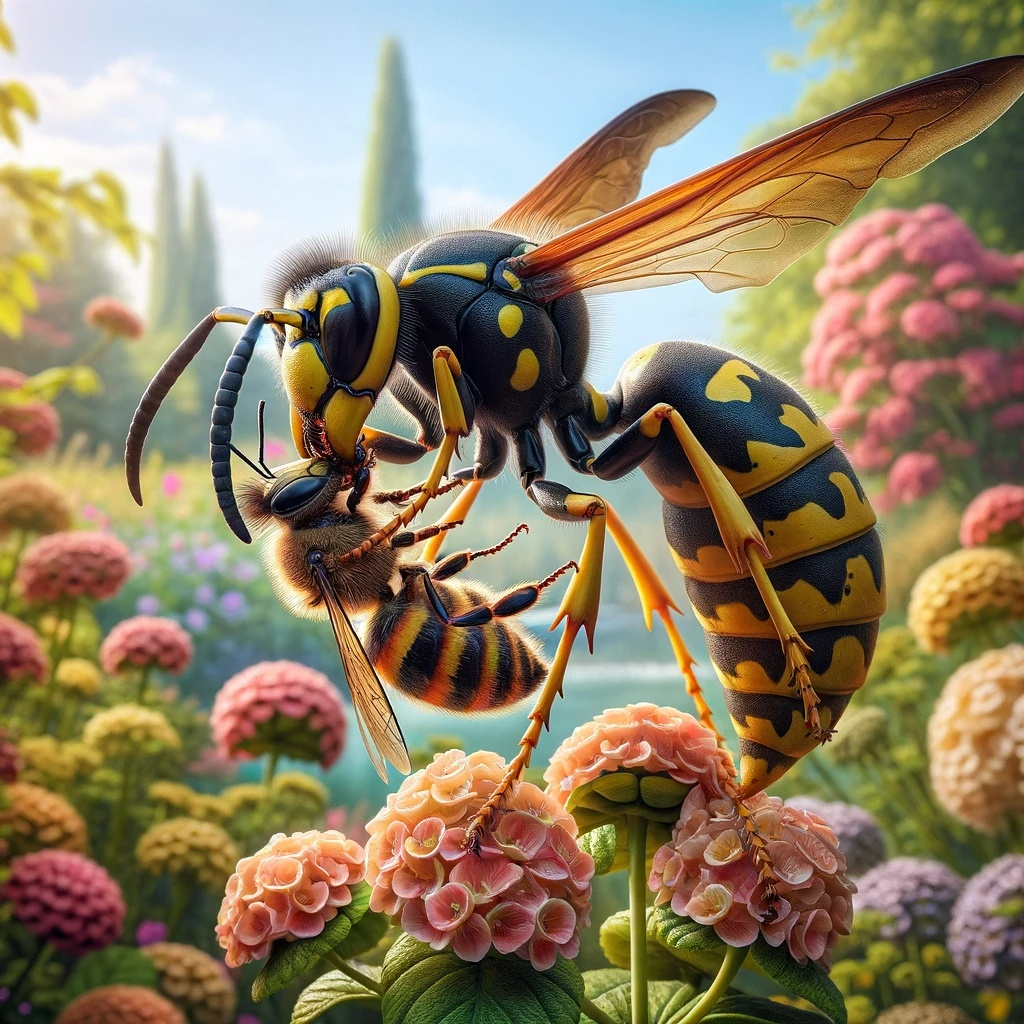

In [26]:
url = 'https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg'
img = download_image(url)
img

In [27]:
def prepare_input(x):
    return x / 255.0

In [28]:
img = prepare_image(img, target_size=(150,150))
x = np.array(img, dtype=np.float32)
X = np.array([x])
X = prepare_input(X)

In [29]:
X[0,0,0,0]

0.94509804

In [30]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
dict(zip(classes, preds[0]))

{'bee': 0.6592137}

Question 3

0.3450980

0.5450980

0.7450980

0.9450980 <<-- Answer

Question 4


Now let's apply this model to this image. What's the output of the model?

0.258

0.458

0.658 <<--Answer

0.858

Question 5

162 Mb

362 Mb

662 Mb <<--Answer

962 Mb

Question 6

What's the output from the model?

0.2453

0.4453 <<-- Answer

0.6453

0.8453